In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# load data
cars = pd.read_csv("/Users/WoodPecker/PycharmProjects/JupyterProject/auto-mpg.data.txt",sep="\s+",header=None)

# extract power and weight as data matrix X
X = cars.iloc[:, [3,4]].values

# extract origin (0:Non-U.S. / 1:U.S.) as target vector y
y = [1 if o == 1 else 0 for o in cars.iloc[:, 7].values]

# split into training data (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)

# fit logistic regression model on training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# output intercept and coefficients
lr.intercept_ # [-3.82184907]
lr.coef_ # [-0.00600983, 0.00178002]

array([[-0.00721542,  0.0027984 ]])

In [14]:
# perform prediction and state whether it is correct
correct = 0
incorrect = 0
y_predicted = lr.predict(X_test)
for i in range(0, len(y_test)):
    print("Car with " + str(X_test[i, 0]) + " hp and weight " + str(X_test[i,1]) + " lbs")
    print("Predicted class: " + str(y_test[i]) + " / Correct class: " + str(y_predicted[i]) + "\n")
    if (y_test[i] == y_predicted[i]):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
        
print(str(correct) + " classified correctly")
print(str(incorrect) + " classified incorrectly") 

Car with 75.0 hp and weight 2125.0 lbs
Predicted class: 1 / Correct class: 0

Car with 88.0 hp and weight 2890.0 lbs
Predicted class: 1 / Correct class: 1

Car with 160.0 hp and weight 4456.0 lbs
Predicted class: 1 / Correct class: 1

Car with 63.0 hp and weight 2125.0 lbs
Predicted class: 1 / Correct class: 0

Car with 67.0 hp and weight 2145.0 lbs
Predicted class: 0 / Correct class: 0

Car with 90.0 hp and weight 3210.0 lbs
Predicted class: 1 / Correct class: 1

Car with 60.0 hp and weight 1968.0 lbs
Predicted class: 0 / Correct class: 0

Car with 67.0 hp and weight 3250.0 lbs
Predicted class: 0 / Correct class: 1

Car with 95.0 hp and weight 3102.0 lbs
Predicted class: 1 / Correct class: 1

Car with 88.0 hp and weight 2279.0 lbs
Predicted class: 0 / Correct class: 0

Car with 60.0 hp and weight 1834.0 lbs
Predicted class: 0 / Correct class: 0

Car with 180.0 hp and weight 4380.0 lbs
Predicted class: 1 / Correct class: 1

Car with 88.0 hp and weight 2740.0 lbs
Predicted class: 1 / Co

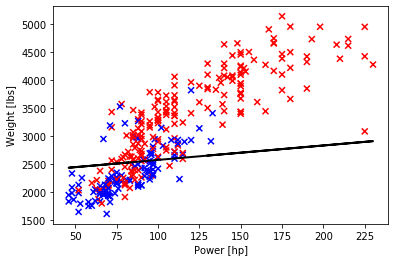

In [15]:
import matplotlib.pyplot as plt

def w_for_hp(hp):
    return (-lr.intercept_[0] - lr.coef_[0][0]*hp) / lr.coef_[0][1]

hp_train = X_train[:,0]
weight_train = X_train[:,1]
col_train = ["blue" if o != 1 else "red" for o in y_train]

plt.xlabel('Power [hp]')
plt.ylabel('Weight [lbs]')
plt.scatter(hp_train, weight_train, color=col_train, marker='x')

hp = X[:,0]
plt.plot(hp, w_for_hp(hp), color="black", lw=2)

plt.show()